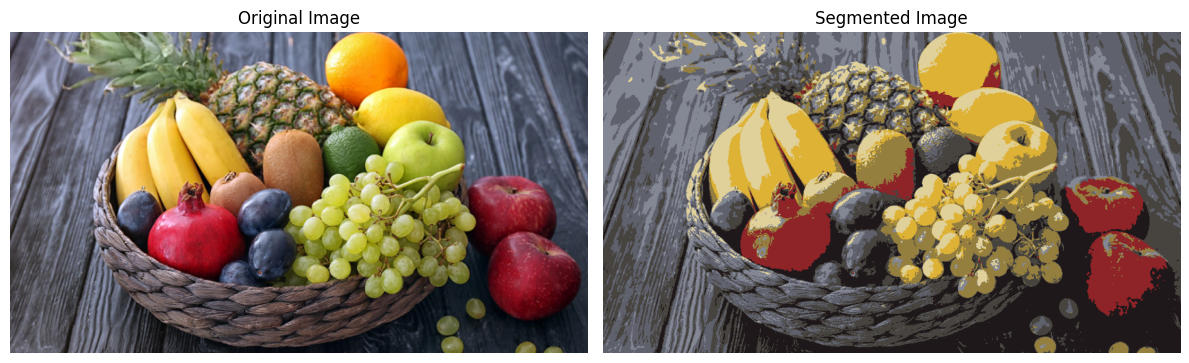

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def construct_coreset(data, k, sample_size):
    # Generate initial centers using k-means++
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(data)
    centers = kmeans.cluster_centers_
    
    # Compute squared distances from each point to each center
    distances = cdist(data, centers, 'sqeuclidean')
    
    # Assign weights based on the closest center
    weights = np.min(distances, axis=1)
    
    # Normalize weights to define a distribution
    weights /= np.sum(weights)
    
    # Sample points based on the computed weights
    indices = np.random.choice(np.arange(len(data)), size=sample_size, replace=False, p=weights)
    coreset = data[indices]
    
    return coreset

# Load the original image
original_image = cv2.imread("fruits.jpg")

# Convert the original image to the RGB color space
original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

# Reshape the image to a 2D array of pixels
pixels = original_image_rgb.reshape((-1, 3))

# Define parameters
k = 8  # Number of clusters
sample_size = 100  # Coreset size

# Construct the coreset
coreset = construct_coreset(pixels, k, sample_size)

# Perform k-means clustering on the original image
kmeans_orig = KMeans(n_clusters=k, random_state=0)
labels_orig = kmeans_orig.fit_predict(pixels)
centers_orig = kmeans_orig.cluster_centers_

# Perform k-means clustering on the coreset
kmeans_coreset = KMeans(n_clusters=k, random_state=0)
labels_coreset = kmeans_coreset.fit_predict(coreset)
centers_coreset = kmeans_coreset.cluster_centers_

# Reconstruct the segmented images
segmented_image_orig = centers_orig[labels_orig].reshape(original_image_rgb.shape)
segmented_image_coreset = centers_coreset[labels_coreset]

# Plotting
plt.figure(figsize=(12, 8))

# Plot the original image
plt.subplot(1, 2, 1)
plt.imshow(original_image_rgb)
plt.title("Original Image")
plt.axis("off")

# Plot the segmented image on the original file
plt.subplot(1, 2, 2)
plt.imshow(segmented_image_orig.astype(np.uint8))
plt.title("Segmented Image")
plt.axis("off")

plt.tight_layout()
plt.show()